## A Regression Challenge

The task is to fit a model to the provided data as closely as possible.

There are 2 datasets provided, a train and a validation set.
Train a model on the train data, and measure its performance on the validation data. The final 'Y' column is the target variable.

For the model training, use either PyTorch or Keras (any version).
For your model, use a standard type of neural net.

Measure its performance using the MAE (mean absolute error).
A reasonably good perforance would be *MAE < 0.006*.

Put your solution in a notebook in "Progress Report" of "IU Vision Team" folder and show clearly the MAE you attain.

Some example 'skeleton' code is provided below (in PyTorch) to help you start (if you're using Keras, thats fine, but you'll have to provide equivalent code in Keras).

Please develop/ modify this as you wish, and provide the missing parts to complete model training/ evaluation. For example-
- a model 
- an optimizer, loss function, etc ...
- any other elements to 
    - process/ pre-process data
    - understand, optimise the data, model performance, etc

Show your output and results, and comment on them.



In [1]:
import torch
import numpy as np
import pandas as pd
import torch.nn as nn
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
# load data
train_data = pd.read_csv("/content/drive/MyDrive/A regresion challenge/A regresion challenge/train_data.csv")
validation_data = pd.read_csv("/content/drive/MyDrive/A regresion challenge/A regresion challenge/validation_data.csv")

In [3]:
train_data.head()

,X1,X2,X3,X4,X5,X6,Y
0,-0.952204,0.157959,0.029486,-0.003709,-0.002917,0.003266,-0.019858
1,-0.186067,-0.439581,-0.654635,-0.572225,-0.057126,0.042308,-0.085403
2,0.857060,0.413905,-0.014067,-0.053177,-0.042255,-0.009404,-0.017326
3,-0.412507,0.100013,-0.769456,0.331753,0.083715,-0.092870,0.077849
4,-0.881807,0.305316,0.012019,0.068658,0.002944,0.003891,-0.020516


In [4]:
validation_data.head()

,X1,X2,X3,X4,X5,X6,Y
0,0.063108,0.794743,-0.186720,0.433876,-0.187222,-0.490015,0.195489
1,0.611182,-0.597004,0.044766,-0.352398,-0.097417,0.067764,-0.006595
2,0.669031,-0.500237,0.550192,-0.031831,0.258201,0.082658,-0.010721
3,0.468316,-0.188588,0.827983,0.090006,0.005561,-0.006643,0.015131
4,-0.535109,-0.015900,-0.420285,0.240239,0.526045,0.525628,-0.038667


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      2000 non-null   float64
 1   X2      2000 non-null   float64
 2   X3      2000 non-null   float64
 3   X4      2000 non-null   float64
 4   X5      2000 non-null   float64
 5   X6      2000 non-null   float64
 6   Y       2000 non-null   float64
dtypes: float64(7)
memory usage: 109.5 KB


In [6]:
#Statistical Analysis
train_data.describe()

,X1,X2,X3,X4,X5,X6,Y
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,-0.037983,-0.002207,0.005549,0.004513,0.000981,-0.000364,-0.019287
std,0.707442,0.498116,0.350643,0.255118,0.182133,0.179326,0.057808
min,-1.120296,-1.035206,-1.001156,-0.920639,-0.910872,-0.871461,-0.353553
25%,-0.739849,-0.362554,-0.171900,-0.090661,-0.049047,-0.050388,-0.032253
50%,-0.060754,-0.008018,0.002650,0.000595,-0.000602,-0.001068,-0.019996
75%,0.653997,0.340964,0.178030,0.097219,0.046533,0.039653,-0.004998
max,1.147133,1.099065,1.009999,0.950256,0.790879,1.022727,0.326789


**Process/ pre-process data**

In [7]:
# Have any missing values in dataset??
print(train_data.isnull().sum(),'\n', validation_data.isnull().sum())

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
Y     0
dtype: int64 
 X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
Y     0
dtype: int64


In [8]:
print(train_data.columns)
print(validation_data.columns)

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'Y'], dtype='object')
Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'Y'], dtype='object')


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

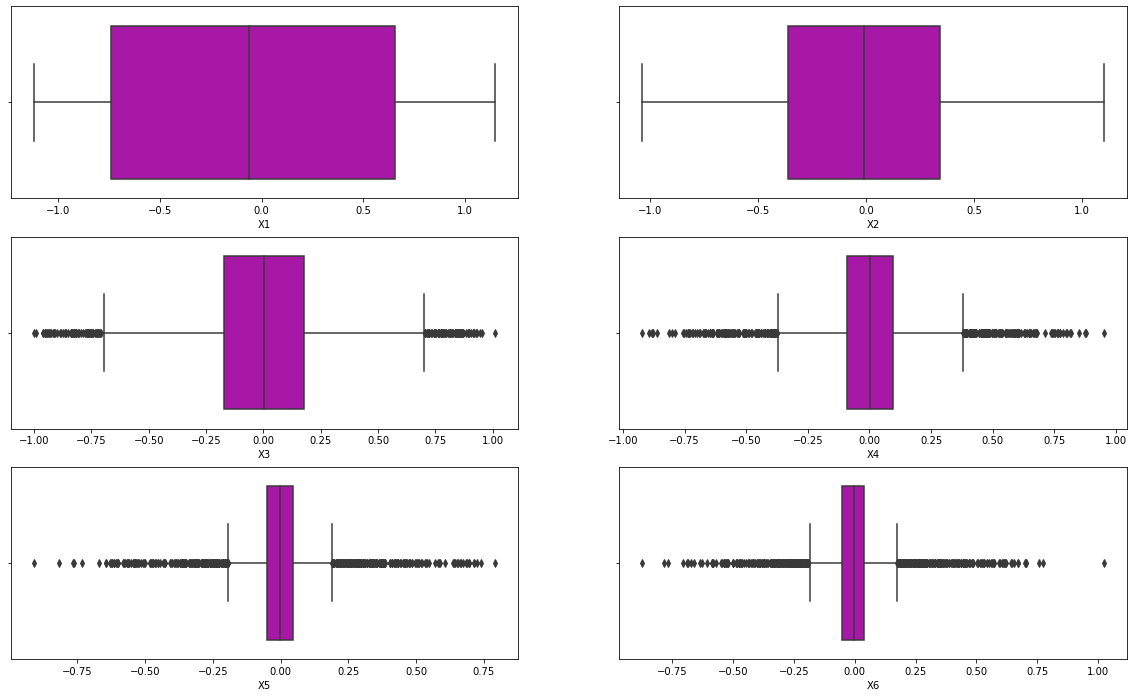

In [9]:
# Box Plot
plt.figure(figsize=(20,12))
features = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6']
import seaborn as sns
import matplotlib.pyplot as plt
for i in range(len(features)):
  plt.subplot(3,2,i+1)
  sns.boxplot(train_data[features[i]], color = 'm')

In [10]:
train_data.shape

(2000, 7)

**Remove outliers**

In [11]:
features = train_data.columns
print(features)

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'Y'], dtype='object')


In [12]:
def r_outlier(train_data, cols):
  for col in cols:
    q1 = train_data[col].quantile(0.25)
    print(q1) # Read quantile value that's not necessary.
    q3 = train_data[col].quantile(0.75)
    iqr = (q3 - q1)
    upper_limit = q3 + 1.5 * iqr
    lower_limit = q1 - 1.5 * iqr
    train_data[col] = np.where(train_data[col]>upper_limit, upper_limit,
                 np.where(train_data[col]<lower_limit, lower_limit, train_data[col]))  
  return train_data    


In [13]:
train_data = r_outlier(train_data, features)

-0.7398494196354847
-0.36255399431053087
-0.171899557015692
-0.0906614235325253
-0.0490468753890793
-0.05038755492606727
-0.0322530539123568


In [14]:
train_data.shape

(2000, 7)

In [15]:
train_data.head()

,X1,X2,X3,X4,X5,X6,Y
0,-0.952204,0.157959,0.029486,-0.003709,-0.002917,0.003266,-0.019858
1,-0.186067,-0.439581,-0.654635,-0.372482,-0.057126,0.042308,-0.073136
2,0.857060,0.413905,-0.014067,-0.053177,-0.042255,-0.009404,-0.017326
3,-0.412507,0.100013,-0.696794,0.331753,0.083715,-0.092870,0.035885
4,-0.881807,0.305316,0.012019,0.068658,0.002944,0.003891,-0.020516


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

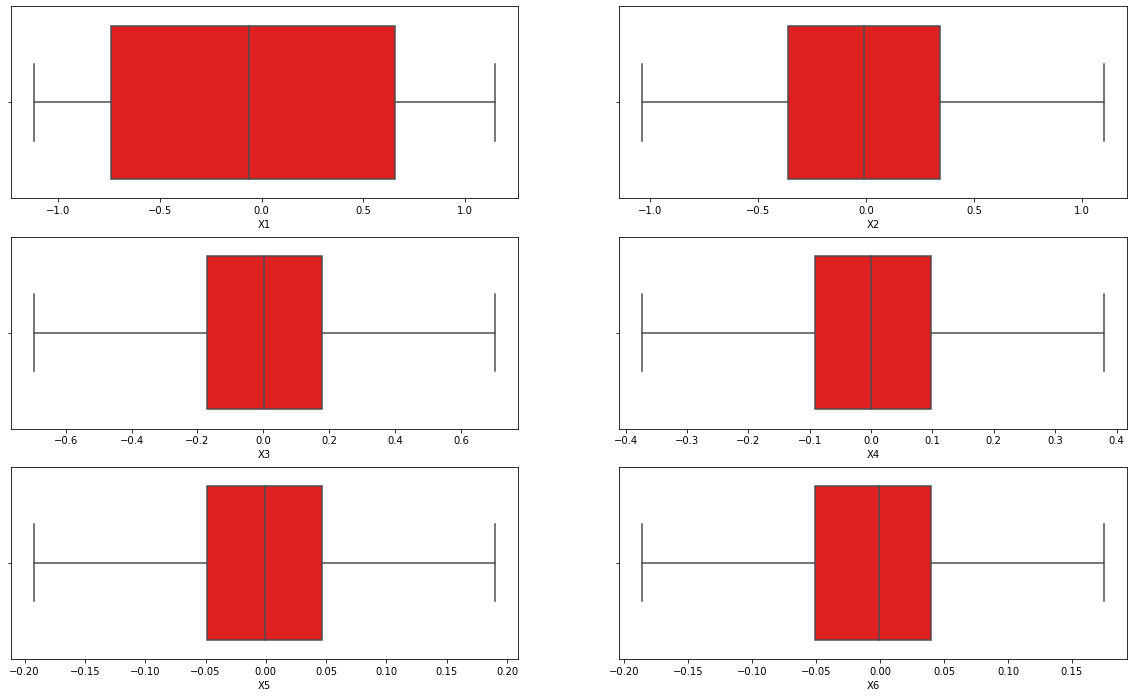

In [16]:
# Box Plot
plt.figure(figsize=(20,12))
features = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6']
import seaborn as sns
import matplotlib.pyplot as plt
for i in range(len(features)):
  plt.subplot(3,2,i+1)
  sns.boxplot(train_data[features[i]], color = 'r')

In [17]:
x_data = train_data.drop('Y', axis = 1) 
target_data = train_data["Y"]
x_val = validation_data.drop('Y', axis = 1) 
target_val_data = validation_data["Y"]

In [18]:
x_data.head()

,X1,X2,X3,X4,X5,X6
0,-0.952204,0.157959,0.029486,-0.003709,-0.002917,0.003266
1,-0.186067,-0.439581,-0.654635,-0.372482,-0.057126,0.042308
2,0.857060,0.413905,-0.014067,-0.053177,-0.042255,-0.009404
3,-0.412507,0.100013,-0.696794,0.331753,0.083715,-0.092870
4,-0.881807,0.305316,0.012019,0.068658,0.002944,0.003891


In [19]:
x_data = x_data.to_numpy()
x_val = x_val.to_numpy()

In [20]:
target_data = target_data.to_numpy()
target_val_data = target_val_data.to_numpy()

In [21]:
class CustomDataset(Dataset):
    def __init__(self, data, targets):
        self.data = torch.from_numpy(data).float()
        self.targets = torch.from_numpy(targets).float()
        
    def __getitem__(self, index):
        x = self.data[index].reshape(-1)
        y = self.targets[index].reshape(-1)
        return x, y
    
    def __len__(self):
        return len(self.data)

In [22]:
train_loader = DataLoader(CustomDataset(x_data, target_data), batch_size=25)
val_loader = DataLoader(CustomDataset(x_val, target_val_data), batch_size=25)

In [23]:
n_input_features = x_data.shape[1]

In [24]:
# define a neural net model
class Net(nn.Module):
    def __init__(self, n_input_features):
      super(Net, self).__init__()
      self.layer1 = nn.Sequential(nn.Linear(n_input_features, 64, bias = True), nn.ReLU())
      self.layer2 = nn.Sequential(nn.Linear(64, 128, bias = True), nn.ReLU())
      self.layer3 = nn.Sequential(nn.Linear(128, 16, bias = True), nn.ReLU() )
      self.layer4 = nn.Sequential(nn.Linear(16, 1, bias = True), nn.Sigmoid() )


    def forward(self, x):
      h1 = self.layer1(x)
      h2 = self.layer2(h1)
      h3 = self.layer3(h2)
      output = self.layer4(h3)
      return output 

      
model = Net(n_input_features)

In [27]:
n_epochs = 100
learning_rate = 0.01
criterion = nn.MSELoss()
import torch.optim as optim
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

model.train()

for epoch in range(n_epochs):
  train_loss = 0.0
  for data, target in train_loader:
 
    optimizer.zero_grad()
    #forward propagation
    output = model(data)
    #calculate the loss value
    loss = criterion(output, target)
    #Backward propagation
    loss.backward()
    #update weights
    optimizer.step()
 
  AE = 0
  with torch.no_grad():
    for data, target in val_loader:
      output = model(data)
      AE += torch.sum(torch.abs(target - output)).item()
    
  MAE = AE / len(val_loader.dataset)
  print('Val error: {:.6f}\n'.format(MAE))

Val error: 0.041031

Val error: 0.041031

Val error: 0.041031

Val error: 0.041031

Val error: 0.041031

Val error: 0.041031

Val error: 0.041031

Val error: 0.041031

Val error: 0.041031

Val error: 0.041031

Val error: 0.041030

Val error: 0.041030

Val error: 0.041030

Val error: 0.041030

Val error: 0.041030

Val error: 0.041030

Val error: 0.041030

Val error: 0.041030

Val error: 0.041030

Val error: 0.041030

Val error: 0.041030

Val error: 0.041030

Val error: 0.041030

Val error: 0.041030

Val error: 0.041030

Val error: 0.041030

Val error: 0.041030

Val error: 0.041030

Val error: 0.041030

Val error: 0.041030

Val error: 0.041030

Val error: 0.041030

Val error: 0.041030

Val error: 0.041030

Val error: 0.041030

Val error: 0.041030

Val error: 0.041030

Val error: 0.041030

Val error: 0.041030

Val error: 0.041030

Val error: 0.041030

Val error: 0.041030

Val error: 0.041029

Val error: 0.041029

Val error: 0.041029

Val error: 0.041029

Val error: 0.041029

Val error: 0.